In [177]:
import pandas as pd
import numpy as np
import warnings
from datetime import datetime
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns 

## Functions

In [178]:
#Function for cleaning kitchen items
def replace_with_common_kitchen_items(item):
    
    for word in common_items:
        if word.lower() in item.lower():  
            return word
    return 'Others_appliances'
#Create a function for getting house age
def get_house_age(year_built):
    ytoday = datetime.today().year
    age = ytoday-year_built
    return age
#Function for cleaning floor items
def replace_with_floors(item):
    
    for word in common_floors:
        if word.lower() in item.lower():  
            return word
    return 'Other'

In [179]:
house_df = pd.read_csv('../datat/raw_house_data.csv')
house_df.head()

,MLS,sold_price,zipcode,longitude,latitude,lot_acres,taxes,year_built,bedrooms,bathrooms,sqrt_ft,garage,kitchen_features,fireplaces,floor_covering,HOA
0,21530491,5300000.0,85637,-110.378200,31.356362,2154.00,5272.00,1941,13,10.0,10500.0,0.0,"Dishwasher, Freezer, Refrigerator, Oven",6,"Mexican Tile, Wood",0
1,21529082,4200000.0,85646,-111.045371,31.594213,1707.00,10422.36,1997,2,2.0,7300.0,0.0,"Dishwasher, Garbage Disposal",5,"Natural Stone, Other",0
2,3054672,4200000.0,85646,-111.040707,31.594844,1707.00,10482.00,1997,2,3.0,NaN,NaN,"Dishwasher, Garbage Disposal, Refrigerator",5,"Natural Stone, Other: Rock",NaN
3,21919321,4500000.0,85646,-111.035925,31.645878,636.67,8418.58,1930,7,5.0,9019.0,4.0,"Dishwasher, Double Sink, Pantry: Butler, Refri...",4,"Ceramic Tile, Laminate, Wood",NaN
4,21306357,3411450.0,85750,-110.813768,32.285162,3.21,15393.00,1995,4,6.0,6396.0,3.0,"Dishwasher, Garbage Disposal, Refrigerator, Mi...",5,"Carpet, Concrete",55


In [180]:
#Get information about the data
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MLS               5000 non-null   int64  
 1   sold_price        5000 non-null   float64
 2   zipcode           5000 non-null   int64  
 3   longitude         5000 non-null   float64
 4   latitude          5000 non-null   float64
 5   lot_acres         4990 non-null   float64
 6   taxes             5000 non-null   float64
 7   year_built        5000 non-null   int64  
 8   bedrooms          5000 non-null   int64  
 9   bathrooms         4994 non-null   float64
 10  sqrt_ft           4944 non-null   float64
 11  garage            4993 non-null   float64
 12  kitchen_features  4967 non-null   object 
 13  fireplaces        5000 non-null   object 
 14  floor_covering    4999 non-null   object 
 15  HOA               4438 non-null   object 
dtypes: float64(8), int64(4), object(4)
memory 

In [181]:
#get columns with na values
house_df.isna().sum()

MLS                   0
sold_price            0
zipcode               0
longitude             0
latitude              0
lot_acres            10
taxes                 0
year_built            0
bedrooms              0
bathrooms             6
sqrt_ft              56
garage                7
kitchen_features     33
fireplaces            0
floor_covering        1
HOA                 562
dtype: int64

In [182]:
#get the unique values for each column
# df.nunique()

In [183]:
#HOA has the highest number of NAN values, i check the distribution of the data using the describe function and histplot 
house_df.describe()

,MLS,sold_price,zipcode,longitude,latitude,lot_acres,taxes,year_built,bedrooms,bathrooms,sqrt_ft,garage
count,5.000000e+03,5.000000e+03,5000.000000,5000.000000,5000.000000,4990.000000,5.000000e+03,5000.00000,5000.000000,4994.000000,4944.000000,4993.000000
mean,2.127070e+07,7.746262e+05,85723.025600,-110.912107,32.308512,4.661317,9.402828e+03,1992.32800,3.933800,3.829896,3716.366828,2.816143
std,2.398508e+06,3.185556e+05,38.061712,0.120629,0.178028,51.685230,1.729385e+05,65.48614,1.245362,1.387063,1120.683515,1.192946
min,3.042851e+06,1.690000e+05,85118.000000,-112.520168,31.356362,0.000000,0.000000e+00,0.00000,1.000000,1.000000,1100.000000,0.000000
25%,2.140718e+07,5.850000e+05,85718.000000,-110.979260,32.277484,0.580000,4.803605e+03,1987.00000,3.000000,3.000000,3047.000000,2.000000
50%,2.161469e+07,6.750000e+05,85737.000000,-110.923420,32.318517,0.990000,6.223760e+03,1999.00000,4.000000,4.000000,3512.000000,3.000000
75%,2.180480e+07,8.350000e+05,85749.000000,-110.859078,32.394334,1.757500,8.082830e+03,2006.00000,4.000000,4.000000,4130.250000,3.000000
max,2.192856e+07,5.300000e+06,86323.000000,-109.454637,34.927884,2154.000000,1.221508e+07,2019.00000,36.000000,36.000000,22408.000000,30.000000


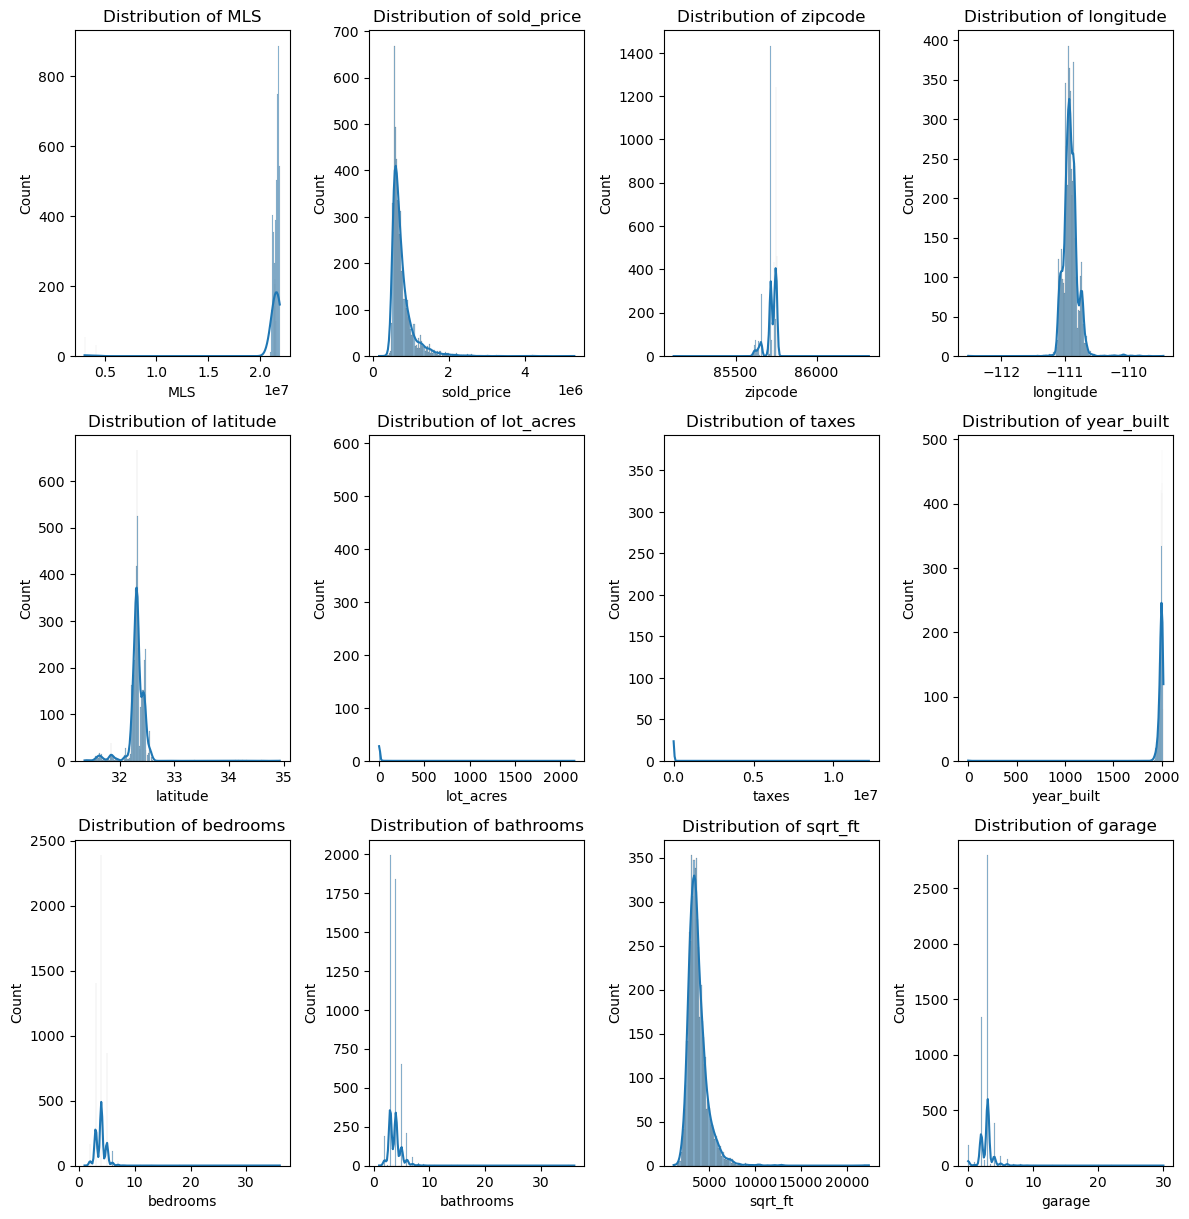

In [184]:
#Get to know data distribution for numerical values:
num_vars_count = len(house_df.select_dtypes(include=['number']).columns)
fig, axes = plt.subplots(nrows=(num_vars_count + 1) // 2, ncols=4, figsize=(12, num_vars_count * 2))
axes = axes.flatten()
for i, var in enumerate(house_df.select_dtypes(include=['number']).columns):
    sns.histplot(house_df[var], ax=axes[i], kde=True)
    axes[i].set_title(f'Distribution of {var}')

# Removing empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

(array([4.432e+03, 1.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 3.000e+00]),
 array([    0.,  2000.,  4000.,  6000.,  8000., 10000., 12000., 14000.,
        16000., 18000., 20000.]),
 <BarContainer object of 10 artists>)

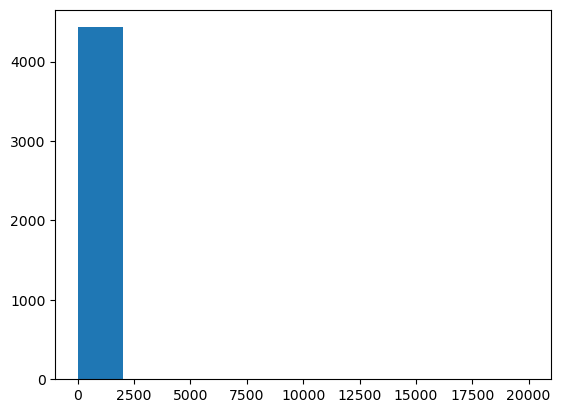

In [185]:
plt.hist(house_df.HOA.str.replace(',', '').astype(float)) #Used replace to remove commas for values such as 20,000

In [186]:
#check all the rows having NAN values - to see whether missing features are important or the entire row can be dropped
nan_df = house_df[house_df.isnull().any(axis=1)]
nan_df.head()

,MLS,sold_price,zipcode,longitude,latitude,lot_acres,taxes,year_built,bedrooms,bathrooms,sqrt_ft,garage,kitchen_features,fireplaces,floor_covering,HOA
2,3054672,4200000.0,85646,-111.040707,31.594844,1707.00,10482.00,1997,2,3.0,NaN,NaN,"Dishwasher, Garbage Disposal, Refrigerator",5,"Natural Stone, Other: Rock",NaN
3,21919321,4500000.0,85646,-111.035925,31.645878,636.67,8418.58,1930,7,5.0,9019.0,4.0,"Dishwasher, Double Sink, Pantry: Butler, Refri...",4,"Ceramic Tile, Laminate, Wood",NaN
10,21900396,2776518.0,85640,-111.045441,31.562121,147.18,7330.36,1935,5,5.0,5067.0,5.0,"Freezer, Refrigerator, Appliance Color: Stainl...",5,"Concrete, Natural Stone, Wood",NaN
39,4113243,2200000.0,85640,-111.044630,31.562185,147.18,3902.44,1935,5,4.5,4963.0,5.0,"Dishwasher, Freezer, Garbage Disposal, Pantry:...",4,"Carpet, Mexican Tile",NaN
49,21818418,1800000.0,86024,-111.228462,34.596971,59.30,4509.90,2003,2,3.0,1999.0,2.0,"Dishwasher, Garbage Disposal, Gas Range, Refri...",1,"Carpet, Wood, Other: Brick",NaN


In [187]:

# These 3 columns cannot be computed using the mean values, if they are missing, then entire row can be avoided

df1 = house_df.copy()
df2 = df1.dropna(subset=['sqrt_ft', 'garage', 'kitchen_features'])

df2.head()

,MLS,sold_price,zipcode,longitude,latitude,lot_acres,taxes,year_built,bedrooms,bathrooms,sqrt_ft,garage,kitchen_features,fireplaces,floor_covering,HOA
0,21530491,5300000.0,85637,-110.378200,31.356362,2154.00,5272.00,1941,13,10.0,10500.0,0.0,"Dishwasher, Freezer, Refrigerator, Oven",6,"Mexican Tile, Wood",0
1,21529082,4200000.0,85646,-111.045371,31.594213,1707.00,10422.36,1997,2,2.0,7300.0,0.0,"Dishwasher, Garbage Disposal",5,"Natural Stone, Other",0
3,21919321,4500000.0,85646,-111.035925,31.645878,636.67,8418.58,1930,7,5.0,9019.0,4.0,"Dishwasher, Double Sink, Pantry: Butler, Refri...",4,"Ceramic Tile, Laminate, Wood",NaN
4,21306357,3411450.0,85750,-110.813768,32.285162,3.21,15393.00,1995,4,6.0,6396.0,3.0,"Dishwasher, Garbage Disposal, Refrigerator, Mi...",5,"Carpet, Concrete",55
5,21528016,3250000.0,85718,-110.910593,32.339090,1.67,27802.84,1999,3,4.0,6842.0,3.0,"Dishwasher, Garbage Disposal, Refrigerator, Mi...",5,"Natural Stone, Wood, Other",422


In [188]:
df2.shape

(4908, 16)

In [189]:
df2.isna().sum()

MLS                   0
sold_price            0
zipcode               0
longitude             0
latitude              0
lot_acres             0
taxes                 0
year_built            0
bedrooms              0
bathrooms             0
sqrt_ft               0
garage                0
kitchen_features      0
fireplaces            0
floor_covering        0
HOA                 538
dtype: int64

In [190]:
# Before dropping HOA, let me check the corretaion with the price, filled nan with 0s assuming the values were missing
df2.HOA = df2.HOA.fillna(0).str.replace(',', '').astype(float)
df2.isna().sum()

MLS                   0
sold_price            0
zipcode               0
longitude             0
latitude              0
lot_acres             0
taxes                 0
year_built            0
bedrooms              0
bathrooms             0
sqrt_ft               0
garage                0
kitchen_features      0
fireplaces            0
floor_covering        0
HOA                 538
dtype: int64

In [191]:
df2.HOA.dtype

dtype('float64')

The correlation between HOA and sold_price is:  0.17243319991727704


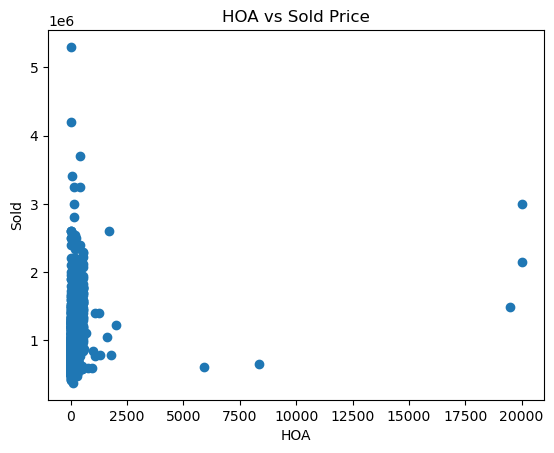

In [192]:
#find correlation
correlation = df2['HOA'].corr(df2['sold_price'])
print(f"The correlation between HOA and sold_price is:  {correlation}")
#Plot graph of HOA against sold_price
plt.scatter(df2['HOA'], df2['sold_price'])
plt.title('HOA vs Sold Price')
plt.xlabel('HOA')
plt.ylabel('Sold')
plt.show()

In [193]:
#If we have a zipcode no need for longitudes and latitude columns, can be dropped
#MLS looks like IDs, so it can be removed as well, has no impact on house price
#Removed HOA as well because it will not significantly affect house price and has multiple NAN values. Correlation with price is weak 0.17 (17%)
#Missing HOA values could not be a factor to consider to delete several records that have most important data available
df3 = df2.drop(columns=['longitude','latitude','MLS','HOA'])
df3.head()

,sold_price,zipcode,lot_acres,taxes,year_built,bedrooms,bathrooms,sqrt_ft,garage,kitchen_features,fireplaces,floor_covering
0,5300000.0,85637,2154.00,5272.00,1941,13,10.0,10500.0,0.0,"Dishwasher, Freezer, Refrigerator, Oven",6,"Mexican Tile, Wood"
1,4200000.0,85646,1707.00,10422.36,1997,2,2.0,7300.0,0.0,"Dishwasher, Garbage Disposal",5,"Natural Stone, Other"
3,4500000.0,85646,636.67,8418.58,1930,7,5.0,9019.0,4.0,"Dishwasher, Double Sink, Pantry: Butler, Refri...",4,"Ceramic Tile, Laminate, Wood"
4,3411450.0,85750,3.21,15393.00,1995,4,6.0,6396.0,3.0,"Dishwasher, Garbage Disposal, Refrigerator, Mi...",5,"Carpet, Concrete"
5,3250000.0,85718,1.67,27802.84,1999,3,4.0,6842.0,3.0,"Dishwasher, Garbage Disposal, Refrigerator, Mi...",5,"Natural Stone, Wood, Other"


In [194]:
df3.shape

(4908, 12)

In [195]:
# Next clean data on kitchen features, get individual item and generate categorical columns which indicate if item is present or not
common_items = ['Dishwasher','Oven', 'Refrigerator','Freezer','Microwave','Countertops','Pantry']

#Now apply the method and create new columns for the dataset to hold appliances
df3['ktn_features_split'] = df3['kitchen_features'].str.split(',\s*')
df3['ktn_features_split'] = df3['ktn_features_split'].apply(lambda x: [replace_with_common_kitchen_items(i) for i in x])

# Create a column for each common appliance
for appliance in common_items + ['Others_appliances']:
    df3['has_'+appliance] = df3['ktn_features_split'].apply(lambda x: 1 if appliance in x else 0)

# Drop kitchen_features and ktn_features_split
df3 = df3.drop(columns=['kitchen_features','ktn_features_split'])
df3.head()

,sold_price,zipcode,lot_acres,taxes,year_built,bedrooms,bathrooms,sqrt_ft,garage,fireplaces,floor_covering,has_Dishwasher,has_Oven,has_Refrigerator,has_Freezer,has_Microwave,has_Countertops,has_Pantry,has_Others_appliances
0,5300000.0,85637,2154.00,5272.00,1941,13,10.0,10500.0,0.0,6,"Mexican Tile, Wood",1,1,1,1,0,0,0,0
1,4200000.0,85646,1707.00,10422.36,1997,2,2.0,7300.0,0.0,5,"Natural Stone, Other",1,0,0,0,0,0,0,1
3,4500000.0,85646,636.67,8418.58,1930,7,5.0,9019.0,4.0,4,"Ceramic Tile, Laminate, Wood",1,0,1,0,0,0,1,1
4,3411450.0,85750,3.21,15393.00,1995,4,6.0,6396.0,3.0,5,"Carpet, Concrete",1,1,1,0,1,0,0,1
5,3250000.0,85718,1.67,27802.84,1999,3,4.0,6842.0,3.0,5,"Natural Stone, Wood, Other",1,1,1,0,1,0,0,1


In [196]:
df3.shape

(4908, 19)

In [197]:
# df3.floor_covering.unique() #shows alot of floor styles but let's choose common tiles

In [198]:
df4 = df3.copy()

In [199]:
df4['house_age'] = df4['year_built'].apply(get_house_age)
df5 = df4.drop(columns=['year_built'])
df5.head()

,sold_price,zipcode,lot_acres,taxes,bedrooms,bathrooms,sqrt_ft,garage,fireplaces,floor_covering,has_Dishwasher,has_Oven,has_Refrigerator,has_Freezer,has_Microwave,has_Countertops,has_Pantry,has_Others_appliances,house_age
0,5300000.0,85637,2154.00,5272.00,13,10.0,10500.0,0.0,6,"Mexican Tile, Wood",1,1,1,1,0,0,0,0,83
1,4200000.0,85646,1707.00,10422.36,2,2.0,7300.0,0.0,5,"Natural Stone, Other",1,0,0,0,0,0,0,1,27
3,4500000.0,85646,636.67,8418.58,7,5.0,9019.0,4.0,4,"Ceramic Tile, Laminate, Wood",1,0,1,0,0,0,1,1,94
4,3411450.0,85750,3.21,15393.00,4,6.0,6396.0,3.0,5,"Carpet, Concrete",1,1,1,0,1,0,0,1,29
5,3250000.0,85718,1.67,27802.84,3,4.0,6842.0,3.0,5,"Natural Stone, Wood, Other",1,1,1,0,1,0,0,1,25


In [200]:
# df5.zipcode.unique() #no need to touch

In [201]:
common_floors = ['Carpet','Tile', 'Wood','Natural Stone','Concrete','Other']
df5['floor_styles_split'] = df5['floor_covering'].str.split(',\s*')
df5['floor_styles_split'] = df5['floor_styles_split'].apply(lambda x: [replace_with_floors(i) for i in x])

for floor in common_floors:
    df5['has_'+floor] = df5['floor_styles_split'].apply(lambda x: 1 if floor in x else 0)

# Drop unnecessary columns
df5 = df5.drop(columns=['floor_covering','floor_styles_split'])
df5.head()

,sold_price,zipcode,lot_acres,taxes,bedrooms,bathrooms,sqrt_ft,garage,fireplaces,has_Dishwasher,...,has_Countertops,has_Pantry,has_Others_appliances,house_age,has_Carpet,has_Tile,has_Wood,has_Natural Stone,has_Concrete,has_Other
0,5300000.0,85637,2154.00,5272.00,13,10.0,10500.0,0.0,6,1,...,0,0,0,83,0,1,1,0,0,0
1,4200000.0,85646,1707.00,10422.36,2,2.0,7300.0,0.0,5,1,...,0,0,1,27,0,0,0,1,0,1
3,4500000.0,85646,636.67,8418.58,7,5.0,9019.0,4.0,4,1,...,0,1,1,94,0,1,1,0,0,1
4,3411450.0,85750,3.21,15393.00,4,6.0,6396.0,3.0,5,1,...,0,0,1,29,1,0,0,0,1,0
5,3250000.0,85718,1.67,27802.84,3,4.0,6842.0,3.0,5,1,...,0,0,1,25,0,0,1,1,0,1


In [202]:
df5 = df5.rename(columns={'has_Other': 'has_other_floors'}) # rename the has_other column to make sense specific for floors

In [203]:
df6 = df5.copy()

In [204]:
df6.isnull().sum()

sold_price               0
zipcode                  0
lot_acres                0
taxes                    0
bedrooms                 0
bathrooms                0
sqrt_ft                  0
garage                   0
fireplaces               0
has_Dishwasher           0
has_Oven                 0
has_Refrigerator         0
has_Freezer              0
has_Microwave            0
has_Countertops          0
has_Pantry               0
has_Others_appliances    0
house_age                0
has_Carpet               0
has_Tile                 0
has_Wood                 0
has_Natural Stone        0
has_Concrete             0
has_other_floors         0
dtype: int64

In [205]:
# df6.to_csv('Cleaned_raw_house_data.csv', index=False)

### Before removing outliers, check the distributions for each column and drop any druplicates

In [206]:
df7 = df6.drop_duplicates()
df7.shape

(4908, 24)

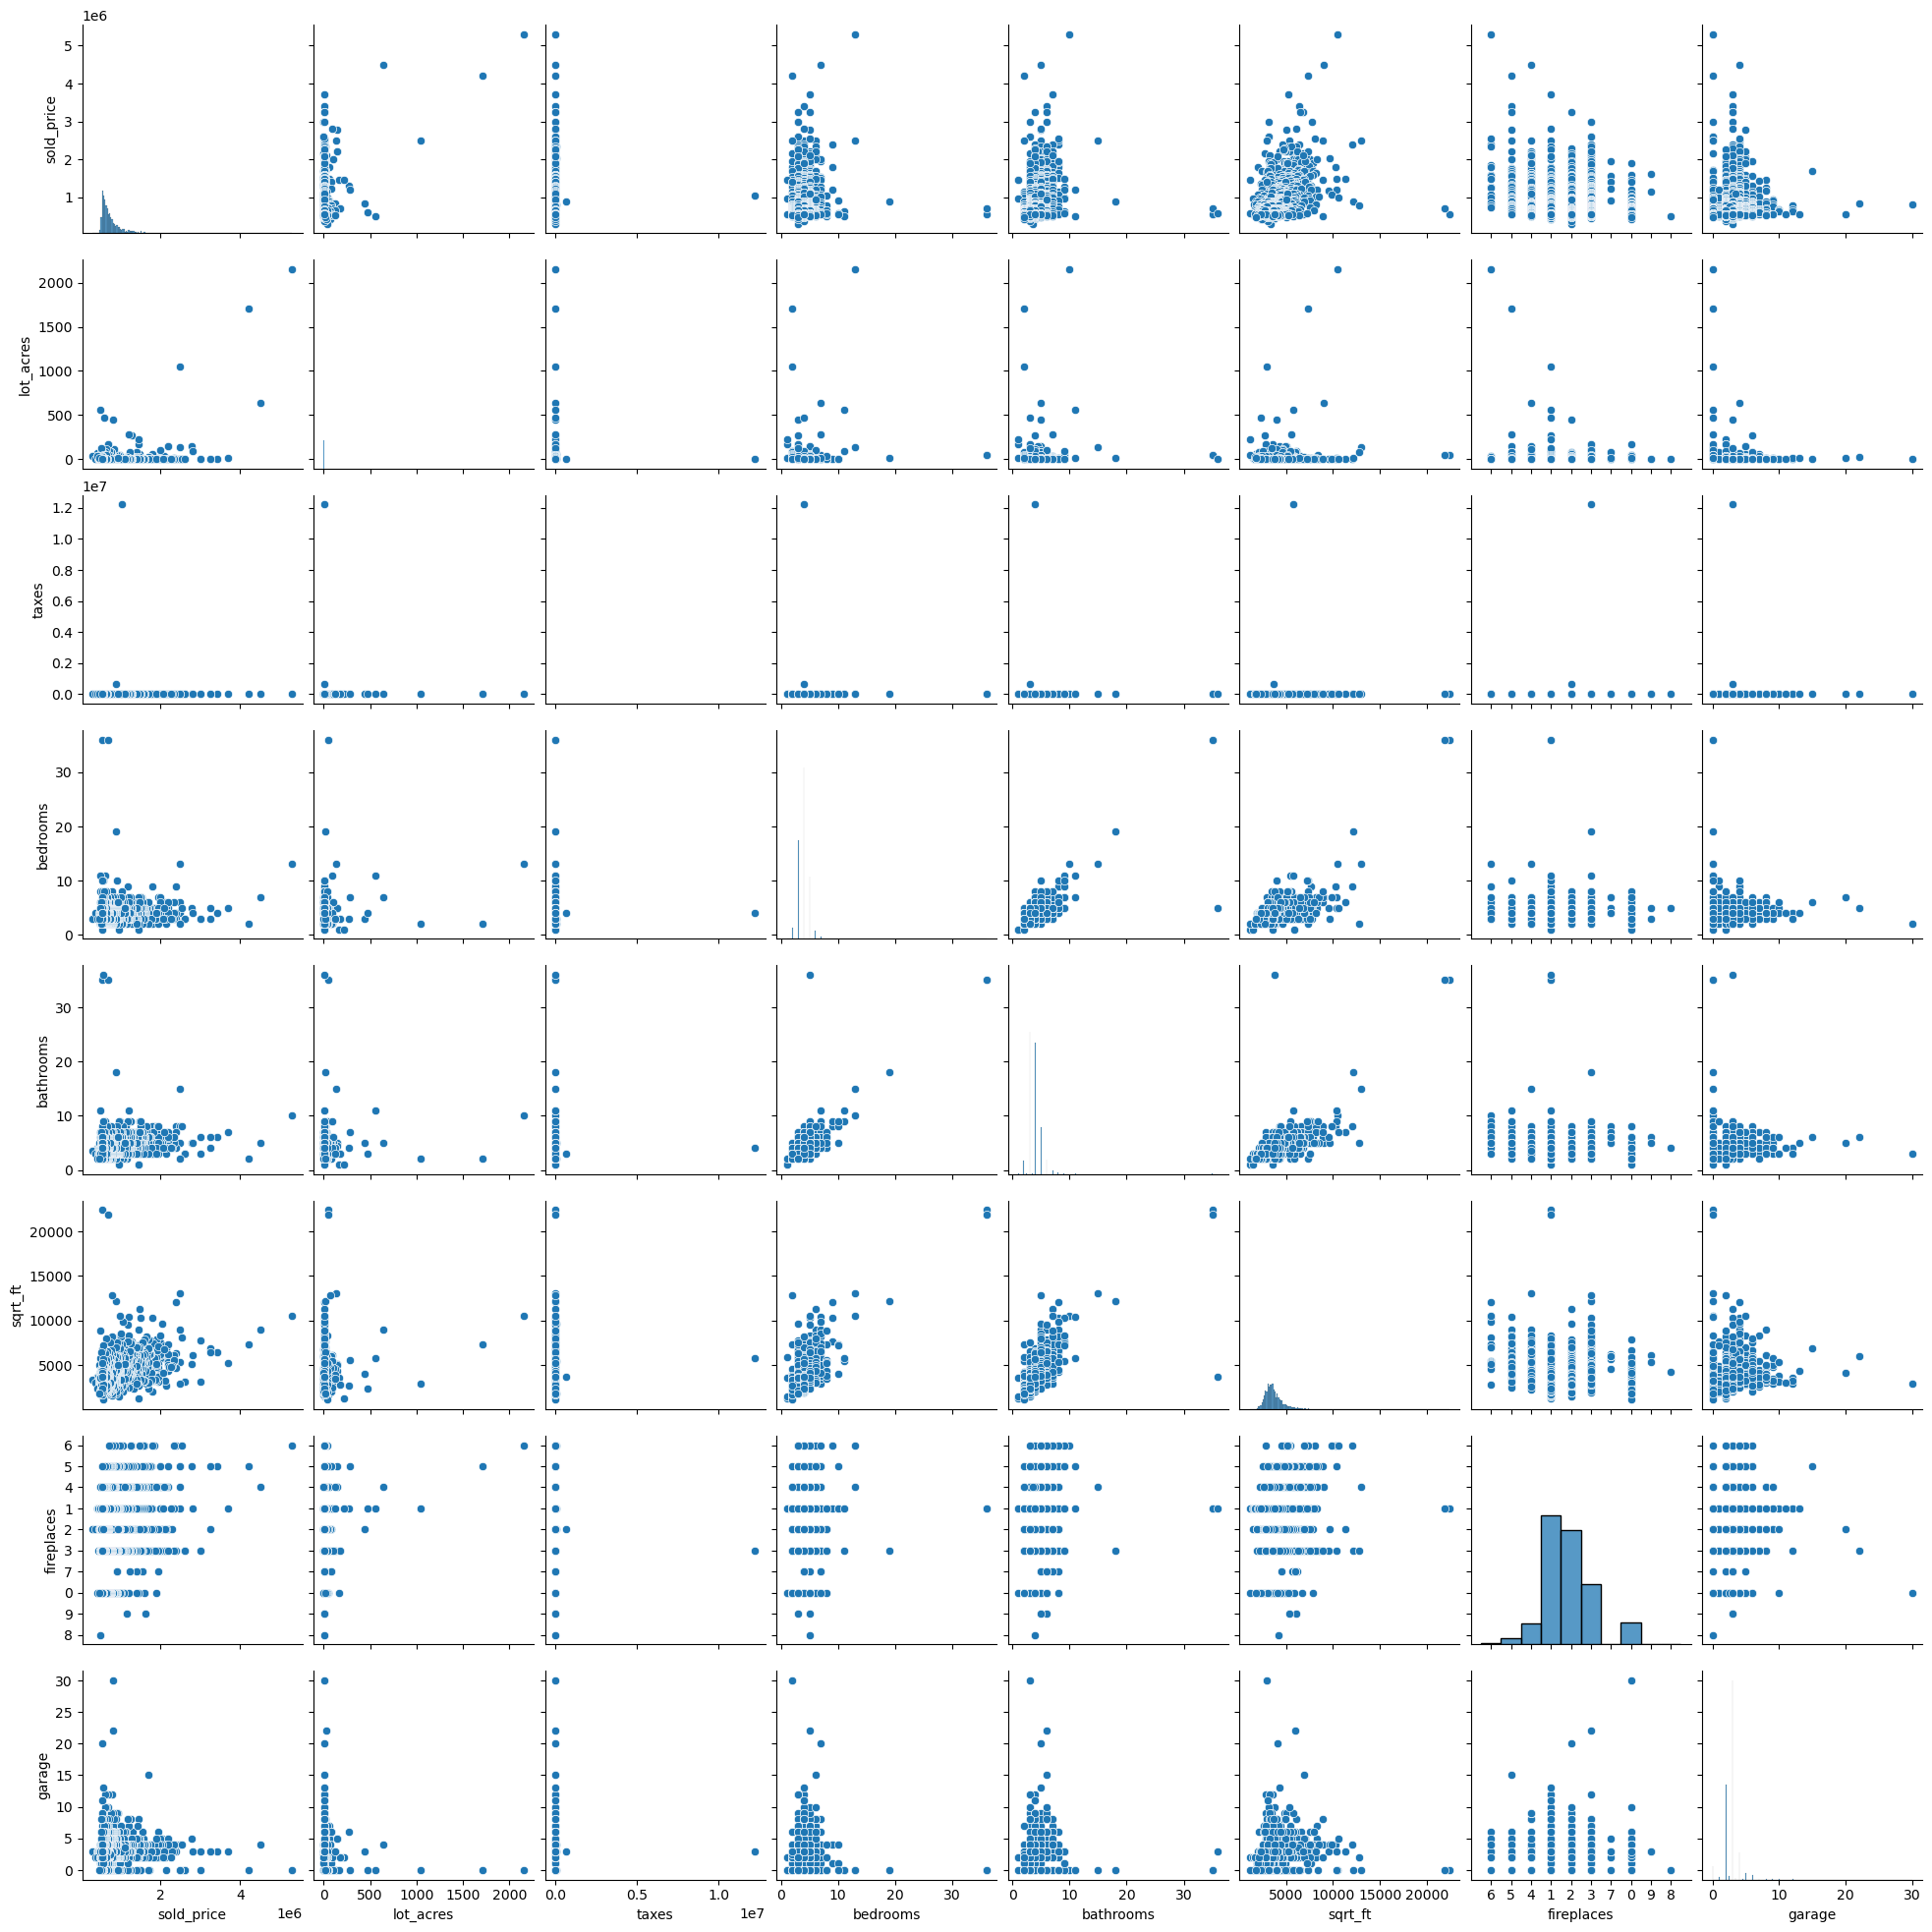

In [207]:
#Plotting distributions for key variables
sns.pairplot(df7, vars=['sold_price', 'lot_acres', 'taxes', 'bedrooms', 'bathrooms', 'sqrt_ft','fireplaces','garage'])

<Axes: >

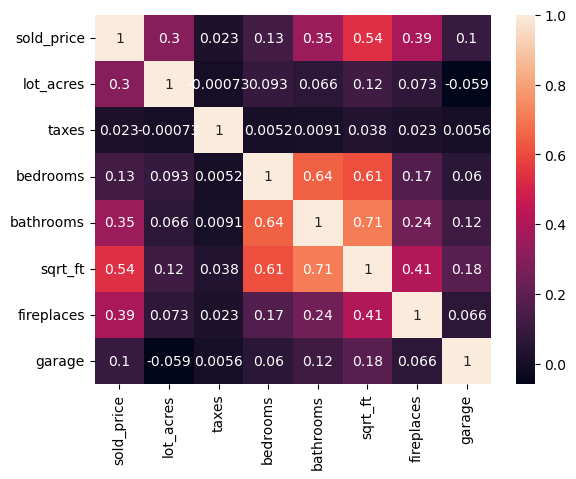

In [208]:
sns.heatmap(df7[['sold_price', 'lot_acres', 'taxes', 'bedrooms', 'bathrooms', 'sqrt_ft','fireplaces','garage']].corr(), annot=True)

Based on the above correlations, taxes clearly has very negligible correlation with the sold price, thus the column can be dropped

In [209]:
df8 = df7.drop(columns=['taxes'], axis=1)
df8.head()

,sold_price,zipcode,lot_acres,bedrooms,bathrooms,sqrt_ft,garage,fireplaces,has_Dishwasher,has_Oven,...,has_Countertops,has_Pantry,has_Others_appliances,house_age,has_Carpet,has_Tile,has_Wood,has_Natural Stone,has_Concrete,has_other_floors
0,5300000.0,85637,2154.00,13,10.0,10500.0,0.0,6,1,1,...,0,0,0,83,0,1,1,0,0,0
1,4200000.0,85646,1707.00,2,2.0,7300.0,0.0,5,1,0,...,0,0,1,27,0,0,0,1,0,1
3,4500000.0,85646,636.67,7,5.0,9019.0,4.0,4,1,0,...,0,1,1,94,0,1,1,0,0,1
4,3411450.0,85750,3.21,4,6.0,6396.0,3.0,5,1,1,...,0,0,1,29,1,0,0,0,1,0
5,3250000.0,85718,1.67,3,4.0,6842.0,3.0,5,1,1,...,0,0,1,25,0,0,1,1,0,1


## Work on removing outliers

In [210]:
df8.dtypes

sold_price               float64
zipcode                    int64
lot_acres                float64
bedrooms                   int64
bathrooms                float64
sqrt_ft                  float64
garage                   float64
fireplaces                object
has_Dishwasher             int64
has_Oven                   int64
has_Refrigerator           int64
has_Freezer                int64
has_Microwave              int64
has_Countertops            int64
has_Pantry                 int64
has_Others_appliances      int64
house_age                  int64
has_Carpet                 int64
has_Tile                   int64
has_Wood                   int64
has_Natural Stone          int64
has_Concrete               int64
has_other_floors           int64
dtype: object

In [211]:
#Convert fireplace values to numeric because it as object
df8.fireplaces = df8.fireplaces.astype('int64')
df8.dtypes

sold_price               float64
zipcode                    int64
lot_acres                float64
bedrooms                   int64
bathrooms                float64
sqrt_ft                  float64
garage                   float64
fireplaces                 int64
has_Dishwasher             int64
has_Oven                   int64
has_Refrigerator           int64
has_Freezer                int64
has_Microwave              int64
has_Countertops            int64
has_Pantry                 int64
has_Others_appliances      int64
house_age                  int64
has_Carpet                 int64
has_Tile                   int64
has_Wood                   int64
has_Natural Stone          int64
has_Concrete               int64
has_other_floors           int64
dtype: object

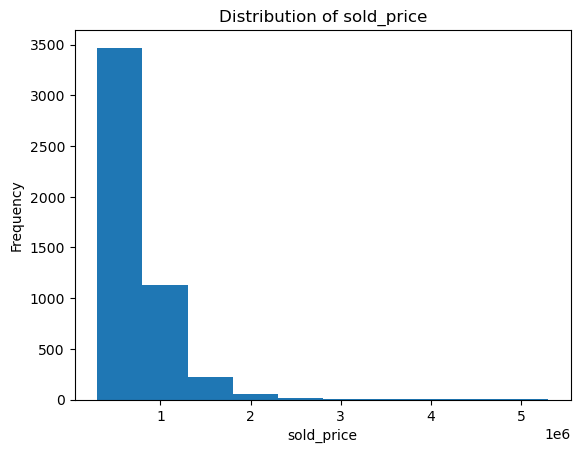

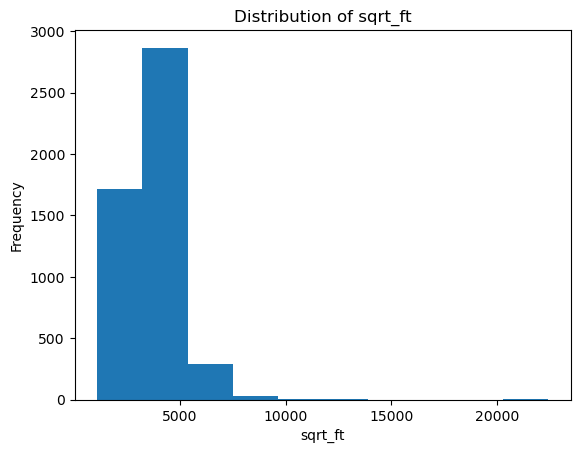

In [212]:
# Show distribution of sqrt_ft and sold_price to check potential anomalies such as small house priced highly
columns_to_plot = ['sold_price', 'sqrt_ft']
for column in columns_to_plot:
  plt.figure()  
  plt.hist(df8[column], bins=10) 
  plt.xlabel(column)
  plt.ylabel('Frequency')
  plt.title(f'Distribution of {column}')
  plt.show()

Text(0, 0.5, 'Sold price')

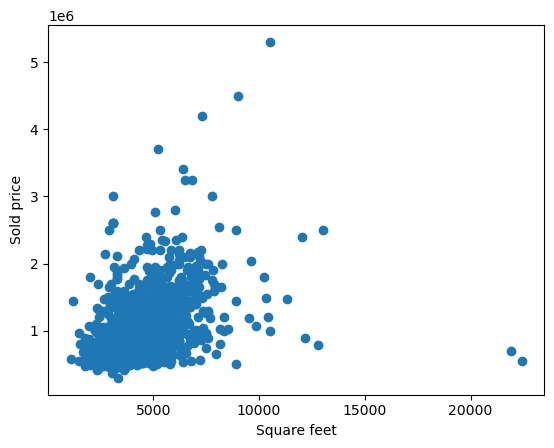

In [213]:
plt.scatter(df8.sqrt_ft, df8.sold_price)
plt.xlabel('Square feet')
plt.ylabel('Sold price')

There are some outliers for houses rated expensive yet the sqrt_ft is small, work on removing this

In [214]:
#use the quantile approach
cols_to_remove_outliers = ['sold_price','sqrt_ft']
Q1 = df8[cols_to_remove_outliers].quantile(0.25)
Q3 = df8[cols_to_remove_outliers].quantile(0.75)
IQR = Q3 - Q1
IQR

sold_price    255000.0
sqrt_ft         1076.0
dtype: float64

In [215]:
#Get all outliers
df9 = df8[~((df8[cols_to_remove_outliers] < (Q1 - 1.5 * IQR)) | (df8[cols_to_remove_outliers] > (Q3 + 1.5 * IQR))).any(axis=1)]
df9.head()

,sold_price,zipcode,lot_acres,bedrooms,bathrooms,sqrt_ft,garage,fireplaces,has_Dishwasher,has_Oven,...,has_Countertops,has_Pantry,has_Others_appliances,house_age,has_Carpet,has_Tile,has_Wood,has_Natural Stone,has_Concrete,has_other_floors
162,1210520.0,85658,0.33,4,5.0,3334.0,2.0,3,1,1,...,0,0,0,2024,1,0,1,1,0,0
217,1100000.0,85755,1.39,4,4.0,5164.0,3.0,4,1,1,...,0,0,1,23,1,0,0,1,0,0
219,1150000.0,85749,11.49,4,5.0,4330.0,3.0,3,1,1,...,0,0,1,17,1,0,1,0,0,1
240,1200000.0,85750,1.21,4,4.0,4426.0,3.0,0,1,1,...,0,0,1,22,0,0,0,1,0,0
261,1200000.0,85718,7.11,3,3.0,3528.0,2.0,1,1,1,...,0,0,1,52,1,1,0,1,0,0


Text(0, 0.5, 'Sold price')

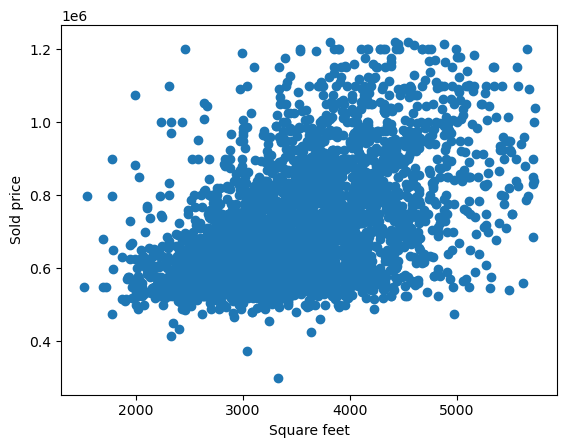

In [216]:
plt.scatter(df10.sqrt_ft, df10.sold_price)
plt.xlabel('Square feet')
plt.ylabel('Sold price')

In [217]:
df9.shape

(4414, 23)

Some rows have house age show a value of 2024, meaning the year_built was recorded as 0 and this is confirmed with above in the first dataframe
I removed the rows with year_built = 0

In [218]:
df10 = df9[df9['house_age'] != 2024]
df10.shape

(4410, 23)

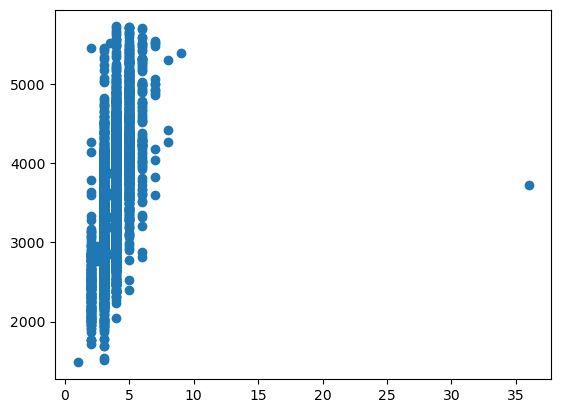

In [219]:
plt.scatter(df10.bathrooms, df10.sqrt_ft)

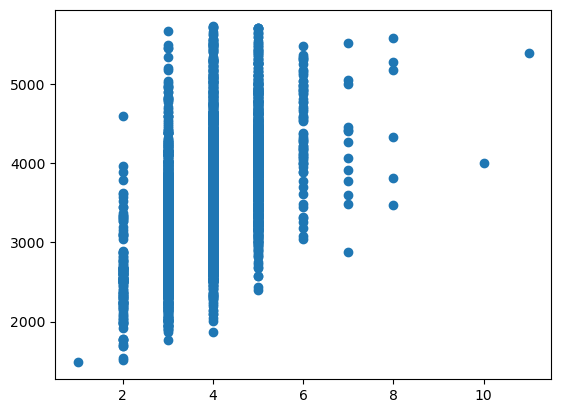

In [220]:
plt.scatter(df10.bedrooms, df10.sqrt_ft)

In [221]:
#Encode zipcodes using onehot encoder
#prefixed the zipcodes with loc_ to distinguish them as variables
dummies = pd.get_dummies(df10.zipcode, prefix='loc_').astype(int)
dummies.head()

,loc__85118,loc__85192,loc__85541,loc__85602,loc__85605,loc__85610,loc__85611,loc__85614,loc__85615,loc__85619,...,loc__85745,loc__85747,loc__85748,loc__85749,loc__85750,loc__85755,loc__85901,loc__85929,loc__85935,loc__86323
217,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
219,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
240,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
261,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
265,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [222]:
#Join the one-hot encoded dara to the main dataframe
df11 = pd.concat([df10.drop(columns=['zipcode']), dummies], axis=1)
df11.shape

(4410, 73)

In [223]:
df11.head()

,sold_price,lot_acres,bedrooms,bathrooms,sqrt_ft,garage,fireplaces,has_Dishwasher,has_Oven,has_Refrigerator,...,loc__85745,loc__85747,loc__85748,loc__85749,loc__85750,loc__85755,loc__85901,loc__85929,loc__85935,loc__86323
217,1100000.0,1.39,4,4.0,5164.0,3.0,4,1,1,1,...,0,0,0,0,0,1,0,0,0,0
219,1150000.0,11.49,4,5.0,4330.0,3.0,3,1,1,1,...,0,0,0,1,0,0,0,0,0,0
240,1200000.0,1.21,4,4.0,4426.0,3.0,0,1,1,1,...,0,0,0,0,1,0,0,0,0,0
261,1200000.0,7.11,3,3.0,3528.0,2.0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
265,1120150.0,2.98,4,6.0,4050.0,4.0,2,1,1,1,...,0,0,0,0,0,0,0,0,0,0


In [224]:
#Write final data cleaned to csv
df11.to_csv("../datat/df11_final_cleaned.csv", index=False)

## Description
1.  Used pd.read_csv to load the dataset into a daraframe house_df
2.  Used house_df.info() to get general information about the dataset. I could get information about columns with missing data, number of observations
3.  I used the decribe() function to get general distribution on numerical data
4.  Dropped all rows where the measurements sqrt_ft,kitchen_features and garage is NAN - information not helpful if measurements are missing
5.  Dropped Longitude, latitude and MLS because have no effect on sold_price. I also dropped HOA column because hit had many NAN value and had a weak correlation with sold price (17%) meaning, it did not significantly impact the house price.
6.  The kicthen and flooring items had desriptive yet important information, i created functions for spliting the data considering the most common items and used them to make new dummy columns (used one-hot encoding) to show whether items are present or not. The least frequently appearing items were grouped as others.
7.  The year_built column did not make sense in the data but getting the age of the house was an important factor, thus created a function to get the age of each house and dropped the year_built column.
   - Since some of the year_built had 0 values, i removed the rows where the value was 0 to avoid outliers.
9.  I used the interquatile range approach to remove outliers for sold_price, sqrt_ft, bedrooms and bathrooms.
10.  Finally i had a dataframe of 4227 rows which is not bad for model training and test. I used to_csv() function to write the data to excel.


<!-- ## Build and test simple regression model -->

In [225]:
## Using the data to do a simple linear regression model test
# X = df11.drop(columns=['sold_price'], axis=1)
# y = df11.sold_price

In [226]:
# from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2024)

In [227]:
# from sklearn.linear_model import Ridge

# ln_clf = Ridge(alpha=0.001,  max_iter=1000)
# ln_clf.fit(X_train_scaled, y_train)
# ln_clf.score(X_test_scaled, y_test)
# Data scalling can be used to improve the score